#Tutorial On Sentiment Analysis
###Domain: Natural Language Processing (NLP)

##What is Natural Language Processing?
> You all may think how computers are able to manage and sound more like human beings even if they are not. This is all because of Natural Language Processing.

> NLP is a branch of Artificial Intelligence (AI) that gives computers/machines the ability to read, understand and derive meaningful information from text.



###Applications of NLP
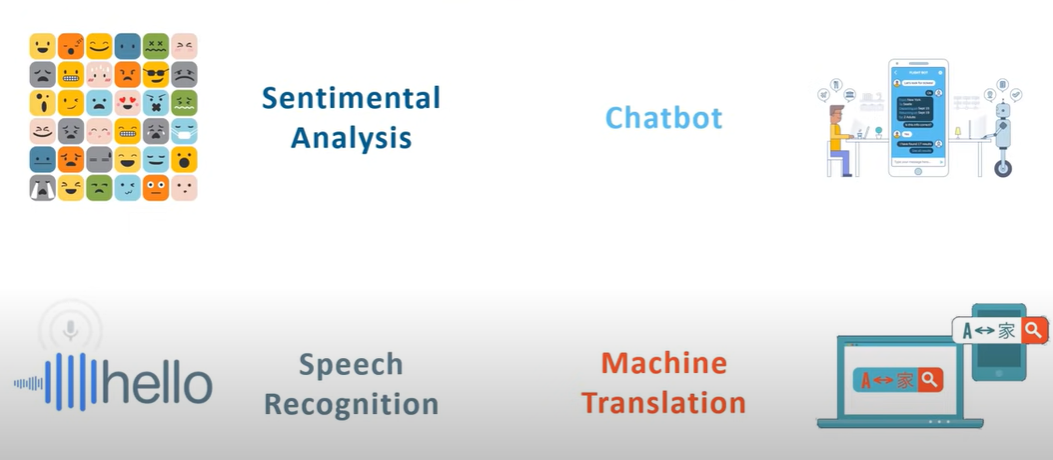

#Sentiment Analysis

Take an example of a company. The company's success depends on the customers if they like the products or not. So one way is to analyze the customer's feedback
or you can say to analyze the sentiment of the customer i.e. if they like or dislike their products. Now the company has millions of users and it is not possible for the company to analyze the sentiments manually. So here the sentiment analysis comes into the picture.

**Sentiment analysis**, one of the NLP fields, is a method applied to a piece of text to know the sentiment i.e. to know whether the phrase is positive, neutral, or negative.
Sentiment analysis is used to analyze the expression like feedbacks, emotions, or attitudes of a person towards a topic or entity.<br><br>
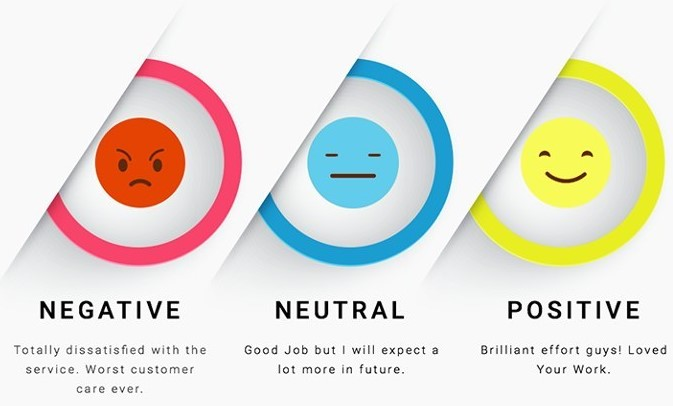

##Types of Sentiment Analysis
* **Fine-grained sentiment:** The analysis is done in terms of polarity of the input. The text is classified into negative, neutral and positive.

* **Emotion Detection Sentiment Analysis:** A way of identifying emotional states such as happy, sad, or angry.

* **Aspect-based:** A way of identifying an aspect regarding of a product like the sound of a speaker. Generally it used for product reviews to know the strong or weak points.

* **Intent analysis:** Identifying the intention mentioned in the text. Usually used for customer support.

##Approaches:
* **Rule-based approach:** It uses a a dictionary of words labelled by sentiment. In this approach we need to follow some rules like tokenization, stemming, lematization, etc.<br>
So we will calculate the polarity of the text. Assign 1 to positive words, -1 to negative words and 0 to neutral words in the statement. And sum it up. If the final sum is greater than 0, i.e. the count of positive words in the statement is more, then the overall statement is positive. If it is less than 0 then the statement is negative. And if the sum is equal to 0 then the statement is neutral.

* **Automatic approach:** Use of Supervised Machine Learning. Consists of algorithms like Naive bayes, LSTM, Linear regression, SVM, etc. The model is trained to classify the statement into positive, neutral or negative.<br>
The advantage of automatic approach is that they have the ability to adapt and create models. ML model can be trained in such a way that they can identify the context of the text.

##Applications
Some of the applications of Sentiment analysis include:

*   Customer service
*   Product feedbacks
*   Product reviews
*   Social media monitoring
*   Market research


##Workflow of Sentiment analysis<br>
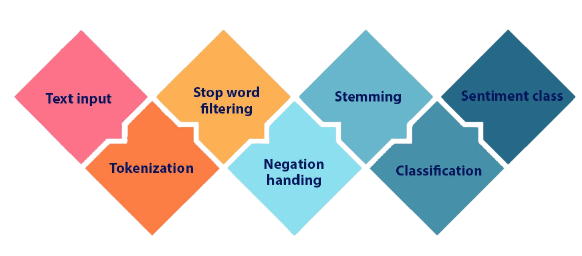

###1. Text input:
Input the text for which you need to do sentiment analysis.
Let us consider a statement to understand the workflow.<br>
Input: The chocolate tastes good.

###2. Tokenization:
This is the process of splitting the input into smaller units like dividing paragraphs into statements and statement into words. Now divide the above input statement into words.
* The
* chocolate
* tastes
* good

###3. Stop word filtering:
Stop words are those words whose removal does not change the meaning of the statement. These words are removed to focus on the meaningful words of the input statement. Applying stop word filtering on our input statement we get:
* ~The~
* chocolate
* tastes
* good<br>
Now we are left with 3 words.

###4.  Negation handling:
Having negation words like no, not, never, etc in the statement can change the polarity of the text if not handled properly which will eventually lead to bad sentiment classification.<br>
For eg: The movie was not that bad.<br>
In this example, there are 2 negative words 'not' and 'bad'. So we will get the output as a Negative statement. But that's not correct.

### 5. Stemming:
It is the process of removing suffix and bringing the word to a base word. It is used to reduce the dimensions of data. Applying stemming on our input statement we get:
* ~The~
* chocol
* tast
* good

###6. Classification:
In this step classify the words into positve, neutral or negative by giving them sentiment scores 1, 0 or -1 respectively. Applying classification on our input statement we get:
* ~The~
* chocol     - score=0
* tast       - score=0
* good       - score=1
On adding all the scores we get: 0+0+1=1

###7. Sentiment Class:
Classify the statement into positve, neutral or negative. Since the final score is 1, which is greater than 0, for our input therefore our statement is classified as positive statement.

#Sentiment Analysis using NLTK
(of an input text)

In [ ]:
#input a string
text = input("Enter the text: ")

Enter the text: The chocolate tastes good!


In [ ]:
#In our input text there are punctuations like ',', '?', and '.' 
#So we need to get rid of these puntuations(because we don't need them in our analysis) i.e. we first need to clean our data.
import string
lower_text = text.lower()  #lower function will convert capital letters into small
#print(string.punctuation)   #it will print all the punctuations that might exist
cleaned_text = lower_text.translate(str.maketrans('','',string.punctuation))   #remove all the punctuations present in the text
print(cleaned_text)

the chocolate tastes good


In [ ]:
#tokenization
import nltk
from nltk import word_tokenize    #nltk is a natural language toolkit used to process textual data
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
tokenized_text = word_tokenize(cleaned_text)   #word_tokenize: it will return a list of words
print("Tokenized text: " + str(tokenized_text))

Tokenized text: ['the', 'chocolate', 'tastes', 'good']


In [ ]:
#stop word filtering
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words("english"))
#print(stop_words)  #list of all the stop words
filtered_text = [i for i in tokenized_text if i not in stop_words]   #filters all the words which are not stop words
print("Filtered text: " + str(filtered_text))

Filtered text: ['chocolate', 'tastes', 'good']


In [ ]:
#stemming
from nltk.stem import PorterStemmer   #to reduce words to root word
ps = PorterStemmer()
x=[]
for i in filtered_text:
  x.append(ps.stem(i))
print(x)

['chocol', 'tast', 'good']


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer    #VADER: Valence Aware Dictionary for Sentiment Reasoning is model sensitive to both polarity & intensity of emotion
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
sentiment_score = SentimentIntensityAnalyzer().polarity_scores(cleaned_text)  #it will return a dictionary of scores for negative, neutral, positive and compound
#the value of compound is calculated by normalizing the the other 3 scores and lie between -1(extreme negative) to +1(extreme positive).

#print(sentiment_score)  
if(sentiment_score['neg'] > sentiment_score['pos']):
  print("Negative Statement")
elif(sentiment_score['pos'] > sentiment_score['neg']):
  print("Positive Statement")
else:
  print("Neutral  Statement")

Positive Statement


#Sentiment Analysis using TextBlob library

In [ ]:
from textblob import TextBlob      #TextBlob is a python library for processing textual data
statement = input("Enter the statement you want to analyze: ")
s = TextBlob(statement)
polarity = s.sentiment.polarity    #polarity will tell us how positive or how negative the statement is
if(polarity<0):                    #the value of polarity will lie between -1 to +1
  print("Polarity = " + str(polarity))
  print("Negative Statement")
elif(polarity==0):
  print("Polarity = " + str(polarity))
  print("Neutral Statement")
elif(polarity>0 and polarity<=1):
  print("Polarity = " + str(polarity))
  print("Positive Statement")

Enter the statement you want to analyze: The movie was horrible!
Polarity = -1.0
Negative Statement


#Sample Code

##Sentiment Analysis (Movie reviews dataset) using Logistic regression

###Logistic Regression (supervised learning algorithm)
Logistic regression is an algorithm used for Binary classification problem.
It is a statistical analysis method used to predict the value based on given set of input data and labels.

###Binary Classification model:
In this we give an input data (x) to the model and the model classify the input into two labels. For eg: either 0 or 1.

In [ ]:
import pandas as pd  #pandas is a data analysis library
import nltk   #nltk is a natural language toolkit used to process textual data

In [ ]:
#download: dataset link: https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
df = pd.read_csv('/DS Datasets/movie_review_dataset.csv')
print(df.shape)   #print the number of rows & columns of the dataset
df.head()   #will show top 5 rows

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df['sentiment'].value_counts()  #count the number of negative and positive sentiments

negative    25000
positive    25000
Name: sentiment, dtype: int64

In [ ]:
#to feed values in algorithmm we need numeric data so replace positve with 1 and negative with 0 in data
df['sentiment'].replace({'positive':1,'negative':0}, inplace=True)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [ ]:
#splitting the data into training data & testing data
#training data:
train_data = df[:40000]
#test data:
test_data = df[40000:]
print(train_data.shape)
print(test_data.shape)

(40000, 2)
(10000, 2)


In [ ]:
train_data['review'][0]  #first review

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [ ]:
#removing html tags from review data
import re    #regex expression
def clean(texts):
  return re.sub(re.compile('<.*?>'),'',texts)    #delete the elements compiled by re.compile('<.*?>') (i.e. html tags) from the input texts

train_data['review'] = train_data['review'].apply(clean)   # apply(): used to apply clean function on the whole review column
train_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. The filming tec...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [ ]:
#to remove special characters
def remove_special_characters(texts):
  texts = texts.lower()   #lower function will convert capital letters into small
  return re.sub(re.compile('[^a-zA-z0-9\s]'),'',texts)

train_data['review'] = train_data['review'].apply(remove_special_characters)
train_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production the filming tech...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically theres a family where a little boy j...,0
4,petter matteis love in the time of money is a ...,1


In [ ]:
train_data['review'][0]

'one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty pictur

In [ ]:
#stemming and stop word filtering
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
stop_words = set(stopwords.words("english"))   #set of all the stop words present in English language
for i in range(0,40000):
  review = train_data['review'][i]
  review = review.split()
  review = [ps.stem(word) for word in review if word not in stop_words]
  review = ' '.join(review)
  train_data['review'][i] = review

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
train_data

,review,sentiment
0,one review mention watch 1 oz episod youll hoo...,1
1,wonder littl product film techniqu unassum old...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic there famili littl boy jake think there ...,0
4,petter mattei love time money visual stun film...,1
...,...,...
39995,marvel funni comedi great cast john ritter kat...,1
39996,plot central charact move camera closeup fact ...,1
39997,show awesom love actor great stori line charac...,1
39998,fact movi entitl success movi switzerland film...,0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()   #CountVectorizer(): used to convert text into vector based on the count of each word
train_matrix = vectorizer.fit_transform(train_data['review'])
test_matrix = vectorizer.transform(test_data['review'])

In [ ]:
X_train_data = train_matrix
X_test_data = test_matrix
Y_train_data = train_data['sentiment']
Y_test_data = test_data['sentiment']

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_data,Y_train_data)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = lr.predict(X_test_data)
print(predictions)

[0 0 0 ... 0 0 0]


In [ ]:
test_data['predicted sentiment'] = predictions    #added a column named as 'predicted sentiment' in our test dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test_data

,review,sentiment,predicted sentiment
40000,First off I want to say that I lean liberal on...,0,0
40001,I was excited to see a sitcom that would hopef...,0,0
40002,When you look at the cover and read stuff abou...,0,0
40003,"Like many others, I counted on the appearance ...",0,0
40004,"This movie was on t.v the other day, and I did...",0,0
...,...,...,...
49995,I thought this movie did a down right good job...,1,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0,0
49997,I am a Catholic taught in parochial elementary...,0,0
49998,I'm going to have to disagree with the previou...,0,0


In [ ]:
#precision, recall:
#precision calculates the value that says out of all total predicted positive sentiment how many were actually positive
#recall calculates the value that says out of all actual positives how many were predicted correctly positive.
from sklearn.metrics import classification_report
print(classification_report(predictions,Y_test_data))

              precision    recall  f1-score   support

           0       0.97      0.54      0.69      8977
           1       0.17      0.84      0.29      1023

    accuracy                           0.57     10000
   macro avg       0.57      0.69      0.49     10000
weighted avg       0.89      0.57      0.65     10000



#Summary
This marks the end of this tutorial. <br>
In this tutorial, we have seen that sentiment analysis is a vital field in NLP. There are 4 types of sentiment analysis based on polarity, emotional states, aspect, and intention.<br>
We learned some basic steps of text analytics operations using NLTK such as tokenization, stemming, etc.<br>
Provided a demonstration of sentiment analysis on movie reviews using logistic regression.